In [108]:
import pandas as pd
import numpy as np 
import warnings 
warnings.filterwarnings('ignore')



In [109]:
psy = pd.read_csv("data\\Youtube01-Psy.csv", usecols = ['CONTENT','CLASS'])
katyperry = pd.read_csv("data\\Youtube02-KatyPerry.csv", usecols = ['CONTENT','CLASS'])
lmfao = pd.read_csv("data\\Youtube03-LMFAO.csv", usecols = ['CONTENT','CLASS'])
eminem = pd.read_csv("data\\Youtube04-Eminem.csv", usecols = ['CONTENT','CLASS'])
shakira = pd.read_csv("data\\Youtube05-Shakira.csv", usecols = ['CONTENT','CLASS'])

In [110]:
print(psy.shape, katyperry.shape, lmfao.shape, eminem.shape, shakira.shape)

(350, 2) (350, 2) (438, 2) (448, 2) (370, 2)


In [111]:
psy

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1
...,...,...
345,How can this have 2 billion views when there's...,0
346,I don't now why I'm watching this in 2014﻿,0
347,subscribe to me for call of duty vids and give...,1
348,hi guys please my android photo editor downloa...,1


In [112]:
# Combining all the data entries in the same DataFrame
data = pd.concat([psy, katyperry, lmfao, eminem, shakira], ignore_index =True)
data.shape

(1956, 2)

In [113]:
data.isnull().sum()


CONTENT    0
CLASS      0
dtype: int64

In [114]:
# data = data.dropna(subset =["CONTENT","CLASS"])

In [115]:
# Encode labels (if they are not already in numerical form, e.g., 0 -> "Spam", 1 -> "Not Spam")
data['CLASS'] = data['CLASS'].map({
    0 :"Not Spam",
    1 : "Spam"
}
)

In [116]:
data

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",Spam
1,Hey guys check out my new channel and our firs...,Spam
2,just for test I have to say murdev.com,Spam
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,Spam
4,watch?v=vtaRGgvGtWQ Check this out .﻿,Spam
...,...,...
1951,I love this song because we sing it at Camp al...,Not Spam
1952,I love this song for two reasons: 1.it is abou...,Not Spam
1953,wow,Not Spam
1954,Shakira u are so wiredo,Not Spam


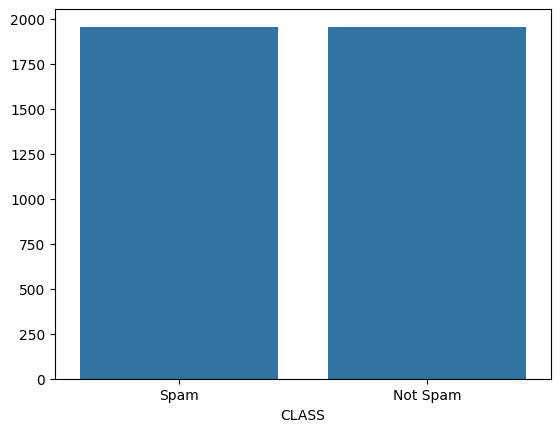

In [157]:
#checking the Distribution of :"SPAM" and "NOT SPAM"
sns.barplot(x='CLASS', y=len(data), data=data)
plt.show()


In [ ]:
data.sample(5)

,CONTENT,CLASS
442,WOW VERY NICE CONGRASULATION I LIVE SO MUCH ht...,Spam
1822,wow,Not Spam
176,https://soundcloud.com/jackal-and-james/wrap-u...,Spam
999,Check out this video on YouTube:﻿,Spam
1496,hey its M.E.S here I&#39;m a young up and comi...,Spam


: 

# Tf-idf vectorizer

In [126]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into training and testing sets
X = np.array(data['CONTENT'])
y = np.array(data['CLASS'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Convert text data to numerical data using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)




# RandomForest

Output:-------------------------------

Accuracy: 0.8877551020408163 

Classification Report:

              precision    recall  f1-score   support

    Not Spam       0.87      0.91      0.89       191
        Spam       0.91      0.87      0.89       201

    accuracy                           0.89       392
   macro avg       0.89      0.89      0.89       392
weighted avg       0.89      0.89      0.89       392



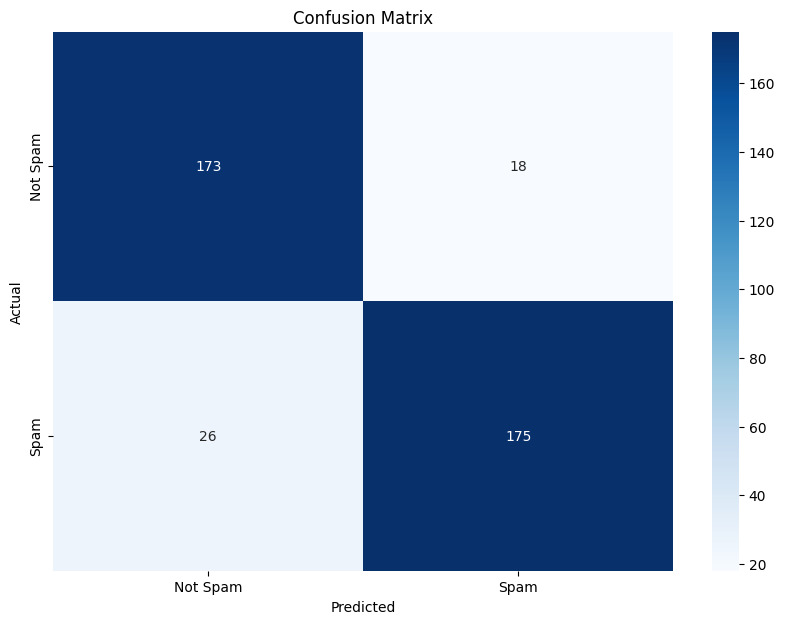

In [147]:
# Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(
    n_estimators=100, # No of DecisionTrees in the Forest
    max_depth = 3, # To stop overfitting
    random_state=42
)

rf_classifier.fit(X_train_tfidf, y_train)

# Make predictions and evaluate the model
y_pred = rf_classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Output:-------------------------------\n")
print(f"Accuracy: {accuracy} \n")
print("Classification Report:\n")
print(report)

# Plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Using CountVectorizer

Accuracy: 0.9540816326530612
Classification Report:
              precision    recall  f1-score   support

    Not Spam       0.93      0.98      0.95       191
        Spam       0.98      0.93      0.95       201

    accuracy                           0.95       392
   macro avg       0.95      0.95      0.95       392
weighted avg       0.96      0.95      0.95       392



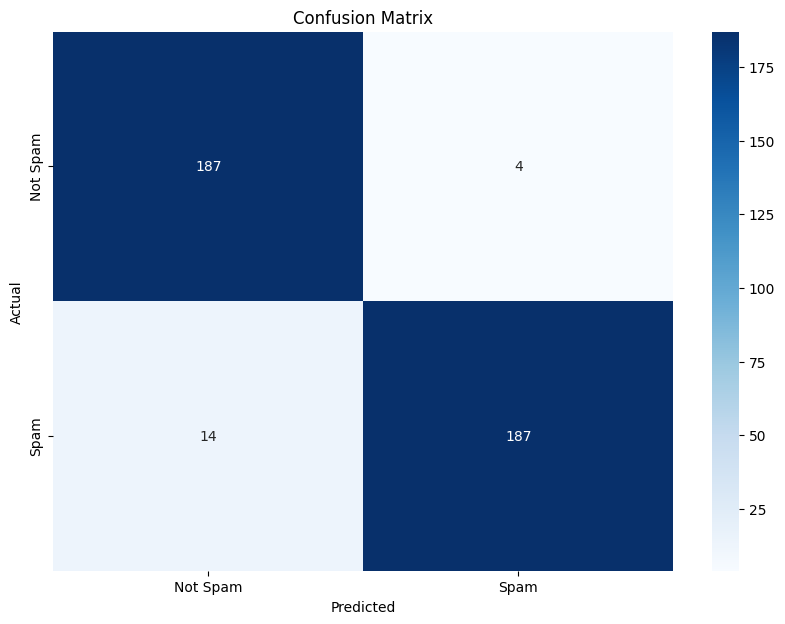

In [149]:
# Convert text data to numerical data using CountVectorizer
count_vectorizer = CountVectorizer(max_features=5000)
X_train_counts = count_vectorizer.fit_transform(X_train)
X_test_counts = count_vectorizer.transform(X_test)

# Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_counts, y_train)

# Make predictions and evaluate the model
y_pred = rf_classifier.predict(X_test_counts)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()